<a href="https://colab.research.google.com/github/Ahmedgamal2581/adventure-works-2022/blob/main/AdventureSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.   **importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2. **load data**



In [ ]:
file_path = '/content/sales tables.xlsx'
xls= pd.ExcelFile('/content/salestables.xlsx')


3.**read data**

In [ ]:
#print sheet names
print(xls.sheet_names)

['CountryRegionCurrency', 'CreditCard', 'Currency', 'CurrencyRate', 'Customer', 'PersonCreditCard', 'SalesOrderDetail', 'SalesOrderHeader', 'SalesOrderHeaderSalesReason', 'Sales person', 'SalesPersonQuotaHistory', 'SalesReason', 'SalesTaxRate', 'SalesTerritory', 'SalesTerritoryHistory', 'ShoppingCartItem', 'SpecialOffer', 'SpecialOfferProduct', 'Store']


In [ ]:
# read data of sheet
df = pd.read_excel(xls, sheet_name='PersonCreditCard')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19118 entries, 0 to 19117
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BusinessEntityID  19118 non-null  int64         
 1   CreditCardID      19118 non-null  int64         
 2   ModifiedDate      19118 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 448.2 KB
None


In [ ]:
df.head()

,BusinessEntityID,CreditCardID,ModifiedDate
0,293,17038,2013-07-31
1,295,15369,2011-08-01
2,297,8010,2011-08-01
3,299,5316,2013-07-31
4,301,6653,2011-05-31


In [ ]:
# read data of sheet
df = pd.read_excel(xls, sheet_name='SalesOrderDetail')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SalesOrderID           121317 non-null  int64         
 1   SalesOrderDetailID     121317 non-null  int64         
 2   CarrierTrackingNumber  60919 non-null   object        
 3   OrderQty               121317 non-null  int64         
 4   ProductID              121317 non-null  int64         
 5   SpecialOfferID         121317 non-null  int64         
 6   UnitPrice              121317 non-null  float64       
 7   UnitPriceDiscount      121317 non-null  float64       
 8   LineTotal              121317 non-null  float64       
 9   rowguid                121317 non-null  object        
 10  ModifiedDate           121317 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 10.2+ MB


In [ ]:
df.head()

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,43659,1,4911-403C-98,1,776,1,2024.994,0.0,2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,2011-05-31
1,43659,2,4911-403C-98,3,777,1,2024.994,0.0,6074.982,7ABB600D-1E77-41BE-9FE5-B9142CFC08FA,2011-05-31
2,43659,3,4911-403C-98,1,778,1,2024.994,0.0,2024.994,475CF8C6-49F6-486E-B0AD-AFC6A50CDD2F,2011-05-31
3,43659,4,4911-403C-98,1,771,1,2039.994,0.0,2039.994,04C4DE91-5815-45D6-8670-F462719FBCE3,2011-05-31
4,43659,5,4911-403C-98,1,772,1,2039.994,0.0,2039.994,5A74C7D2-E641-438E-A7AC-37BF23280301,2011-05-31


In [ ]:
df.isnull().sum()

,0
SalesOrderID,0
SalesOrderDetailID,0
CarrierTrackingNumber,60398
OrderQty,0
ProductID,0
SpecialOfferID,0
UnitPrice,0
UnitPriceDiscount,0
LineTotal,0
rowguid,0


In [ ]:
# ملء القيم المفقودة في 'CarrierTrackingNumber' بالقيمة 'Not Available'
df = df.fillna({'CarrierTrackingNumber': 'Not Available'})

# التحقق من النتائج عن طريق عرض القيم الفريدة في العمود 'CarrierTrackingNumber'
carrier_tracking_unique_values = df['CarrierTrackingNumber'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SalesOrderID           121317 non-null  int64         
 1   SalesOrderDetailID     121317 non-null  int64         
 2   CarrierTrackingNumber  121317 non-null  object        
 3   OrderQty               121317 non-null  int64         
 4   ProductID              121317 non-null  int64         
 5   SpecialOfferID         121317 non-null  int64         
 6   UnitPrice              121317 non-null  float64       
 7   UnitPriceDiscount      121317 non-null  float64       
 8   LineTotal              121317 non-null  float64       
 9   rowguid                121317 non-null  object        
 10  ModifiedDate           121317 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 10.2+ MB


In [ ]:
df['LineTotal'].describe()

,LineTotal
count,121317.000000
mean,905.449207
std,1693.417389
min,1.374000
25%,24.990000
50%,134.982000
75%,1120.490000
max,27893.619000


In [ ]:
df['LineTotal'].sum() #total sales

109846381.39988801

([0], [Text(0, 0, '')])

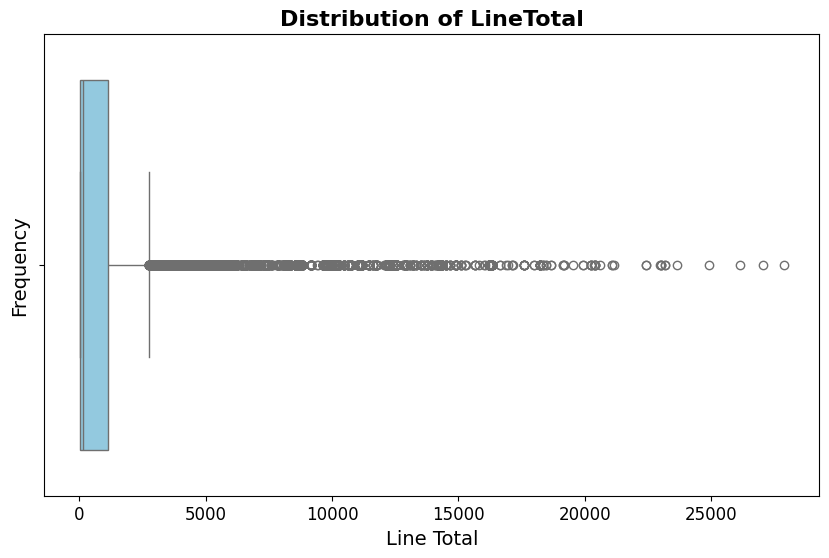

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['LineTotal'], color='skyblue')

plt.title('Distribution of LineTotal', fontsize=16, fontweight='bold')

plt.xlabel('Line Total', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

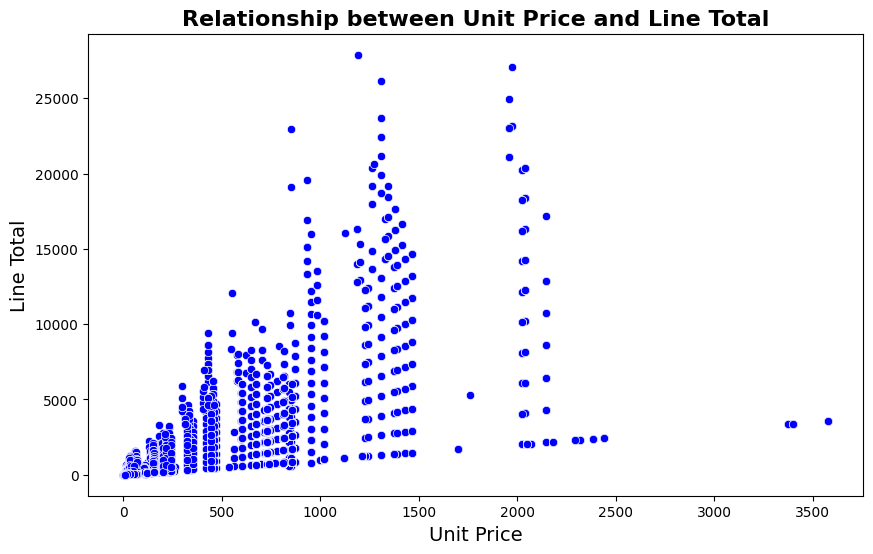

In [ ]:
# رسم مخطط التشتت بين سعر الوحدة والإجمالي لكل سطر
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['UnitPrice'], y=df['LineTotal'], color='blue')

# إضافة العنوان والتسميات
plt.title('Relationship between Unit Price and Line Total', fontsize=16, fontweight='bold')
plt.xlabel('Unit Price', fontsize=14)
plt.ylabel('Line Total', fontsize=14)

# إظهار المخطط
plt.show()

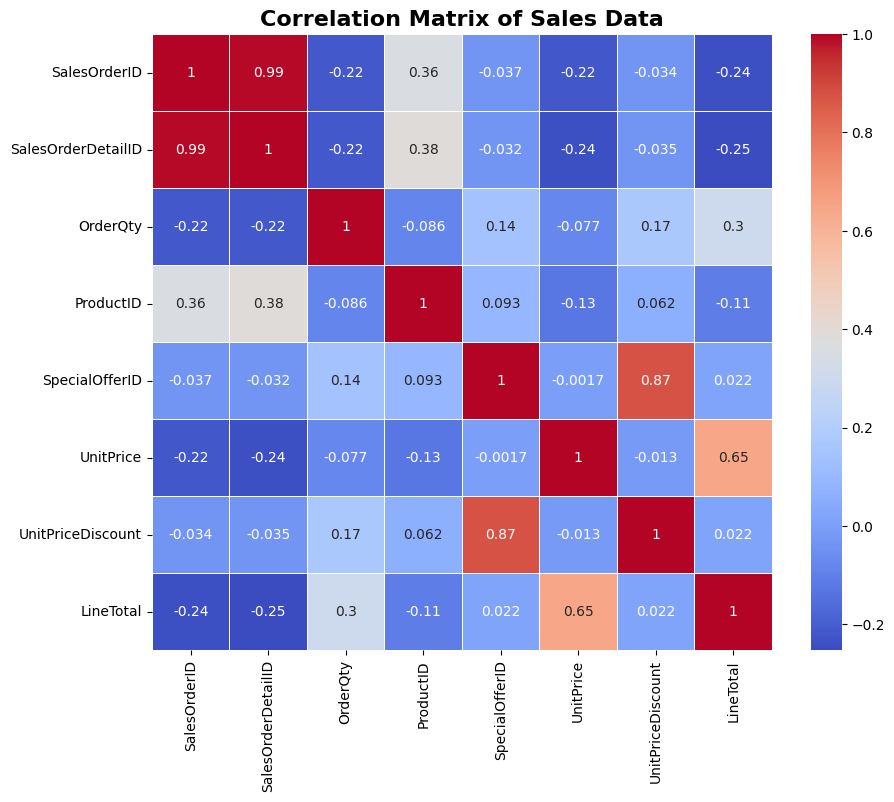

In [ ]:
# حساب مصفوفة الارتباط مع تحديد الأعمدة الرقمية فقط
correlation_matrix = df.select_dtypes(include=['number']).corr()

# رسم مصفوفة الارتباط باستخدام heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# إضافة العنوان
plt.title('Correlation Matrix of Sales Data', fontsize=16, fontweight='bold')

# إظهار المخطط
plt.show()

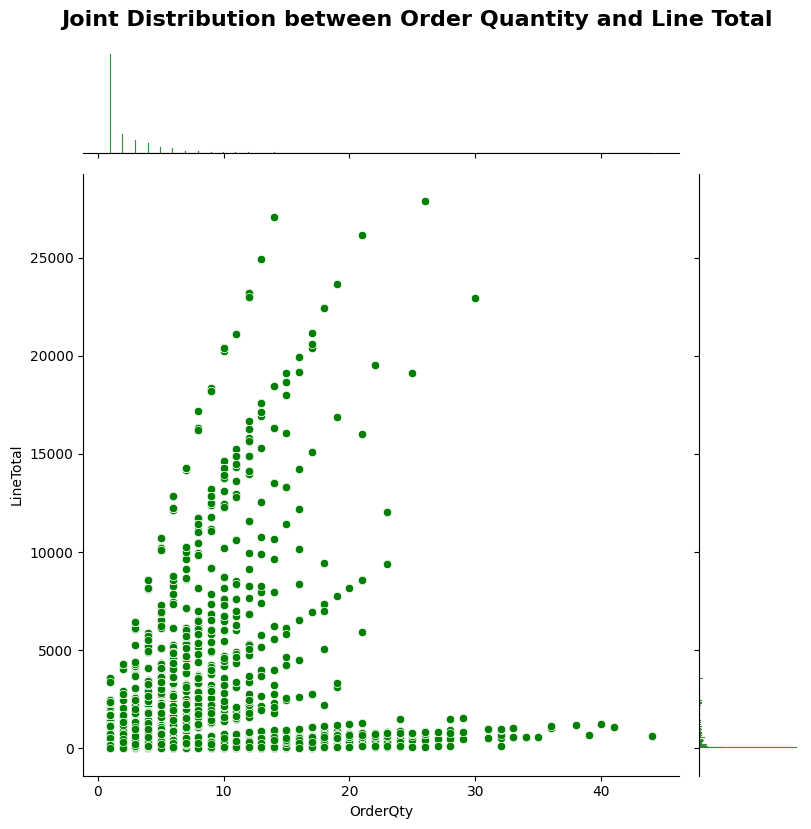

In [ ]:
# تحليل التوزيع المشترك بين كمية الطلب والإجمالي لكل سطر
sns.jointplot(x='OrderQty', y='LineTotal', data=df, kind='scatter', height=8, color='green')

# إضافة العنوان
plt.suptitle('Joint Distribution between Order Quantity and Line Total', y=1.03, fontsize=16, fontweight='bold')

plt.show()

In [ ]:
# حساب معامل الارتباط بين سعر الوحدة والإجمالي لكل سطر
correlation = df['UnitPrice'].corr(df['LineTotal'])
print(f'Correlation between Unit Price and Line Total: {correlation}')

Correlation between Unit Price and Line Total: 0.6458775758804918


In [ ]:
# read data of sheet
df = pd.read_excel(xls, sheet_name='Sales person')
df.head()

,BusinessEntityID,TerritoryID,SalesQuota,Bonus,CommissionPct,SalesYTD,SalesLastYear,rowguid,ModifiedDate
0,274,NaN,NaN,0,0.000,5.596976e+05,0.000000e+00,48754992-9EE0-4C0E-8C94-9451604E3E02,2010-12-28
1,275,2.0,300000.0,4100,0.012,3.763178e+06,1.750406e+06,1E0A7274-3064-4F58-88EE-4C6586C87169,2011-05-24
2,276,4.0,250000.0,2000,0.015,4.251369e+06,1.439156e+06,4DD9EEE4-8E81-4F8C-AF97-683394C1F7C0,2011-05-24
3,277,3.0,250000.0,2500,0.015,3.189418e+06,1.997186e+06,39012928-BFEC-4242-874D-423162C3F567,2011-05-24
4,278,6.0,250000.0,500,0.010,1.453719e+06,1.620277e+06,7A0AE1AB-B283-40F9-91D1-167ABF06D720,2011-05-24


In [ ]:
df.isnull().sum()

,0
BusinessEntityID,0
TerritoryID,3
SalesQuota,3
Bonus,0
CommissionPct,0
SalesYTD,0
SalesLastYear,0
rowguid,0
ModifiedDate,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BusinessEntityID  17 non-null     int64         
 1   TerritoryID       14 non-null     float64       
 2   SalesQuota        14 non-null     float64       
 3   Bonus             17 non-null     int64         
 4   CommissionPct     17 non-null     float64       
 5   SalesYTD          17 non-null     float64       
 6   SalesLastYear     17 non-null     float64       
 7   rowguid           17 non-null     object        
 8   ModifiedDate      17 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 1.3+ KB


**store analysis**

In [ ]:
# read data of sheet
stores_df = pd.read_excel(xls, sheet_name='Store')
stores_df.head()

,BusinessEntityID,Name,SalesPersonID,Demographics,rowguid,ModifiedDate
0,292,Next-Door Bike Store,279,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",A22517E3-848D-4EBE-B9D9-7437F3432304,2014-09-12 11:15:07.497
1,294,Professional Sales and Service,276,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",B50CA50B-C601-4A13-B07E-2C63862D71B4,2014-09-12 11:15:07.497
2,296,Riders Company,277,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",337C3688-1339-4E1A-A08A-B54B23566E49,2014-09-12 11:15:07.497
3,298,The Bike Mechanics,275,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",7894F278-F0C8-4D16-BD75-213FDBF13023,2014-09-12 11:15:07.497
4,300,Nationwide Supply,286,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",C3FC9705-A8C4-4F3A-9550-EB2FA4B7B64D,2014-09-12 11:15:07.497


In [ ]:
sales_header_df  = pd.read_excel(xls, sheet_name='SalesOrderHeader')
sales_header_df .head()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,43659,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43659,PO522145787,10-4020-000676,...,16281.0,105041Vi84182,NaN,20565.6206,1971.5149,616.0984,23153.2339,NaN,79B65321-39CA-4115-9CBA-8FE0903E12E6,2011-06-07
1,43660,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43660,PO18850127500,10-4020-000117,...,5618.0,115213Vi29411,NaN,1294.2529,124.2483,38.8276,1457.3288,NaN,738DC42D-D03B-48A1-9822-F95A67EA7389,2011-06-07
2,43661,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43661,PO18473189620,10-4020-000442,...,1346.0,85274Vi6854,4.0,32726.4786,3153.7696,985.5530,36865.8012,NaN,D91B9131-18A4-4A11-BC3A-90B6F53E9D74,2011-06-07
3,43662,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43662,PO18444174044,10-4020-000227,...,10456.0,125295Vi53935,4.0,28832.5289,2775.1646,867.2389,32474.9324,NaN,4A1ECFC0-CC3A-4740-B028-1C50BB48711C,2011-06-07
4,43663,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43663,PO18009186470,10-4020-000510,...,4322.0,45303Vi22691,NaN,419.4589,40.2681,12.5838,472.3108,NaN,9B1E7A40-6AE0-4AD3-811C-A64951857C4B,2011-06-07


In [ ]:
customers_df= pd.read_excel(xls, sheet_name='Customer')
customers_df.head()

,CustomerID,PersonID,StoreID,TerritoryID,AccountNumber,rowguid,ModifiedDate
0,1,NaN,934.0,1,AW00000001,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2014-09-12 11:15:07.263
1,2,NaN,1028.0,1,AW00000002,E552F657-A9AF-4A7D-A645-C429D6E02491,2014-09-12 11:15:07.263
2,3,NaN,642.0,4,AW00000003,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2014-09-12 11:15:07.263
3,4,NaN,932.0,4,AW00000004,FF862851-1DAA-4044-BE7C-3E85583C054D,2014-09-12 11:15:07.263
4,5,NaN,1026.0,4,AW00000005,83905BDC-6F5E-4F71-B162-C98DA069F38A,2014-09-12 11:15:07.263


In [ ]:
# دمج جدول Store مع Customer باستخدام BusinessEntityID
store_customer_df = pd.merge(stores_df, customers_df, left_on='BusinessEntityID', right_on='StoreID', how='left')

# دمج النتيجة السابقة مع SalesOrderHeader باستخدام CustomerID
merged_df = pd.merge(store_customer_df, sales_header_df, on='CustomerID', how='left')

In [ ]:
print(merged_df.shape)
print(merged_df.columns)

(4507, 38)
Index(['BusinessEntityID', 'Name', 'SalesPersonID_x', 'Demographics',
       'rowguid_x', 'ModifiedDate_x', 'CustomerID', 'PersonID', 'StoreID',
       'TerritoryID_x', 'AccountNumber_x', 'rowguid_y', 'ModifiedDate_y',
       'SalesOrderID', 'RevisionNumber', 'OrderDate', 'DueDate', 'ShipDate',
       'Status', 'OnlineOrderFlag', 'SalesOrderNumber', 'PurchaseOrderNumber',
       'AccountNumber_y', 'SalesPersonID_y', 'TerritoryID_y',
       'BillToAddressID', 'ShipToAddressID', 'ShipMethodID', 'CreditCardID',
       'CreditCardApprovalCode', 'CurrencyRateID', 'SubTotal', 'TaxAmt',
       'Freight', 'TotalDue', 'Comment', 'rowguid', 'ModifiedDate'],
      dtype='object')


In [ ]:
# حساب إجمالي المبيعات (TotalDue) لكل متجر
store_sales = merged_df.groupby('Name')['TotalDue'].sum().reset_index()
print(store_sales)


                          Name     TotalDue
0        A Bicycle Association       0.0000
1                 A Bike Store   95924.0197
2                 A Cycle Shop       0.0000
3      A Great Bicycle Company   10196.1966
4          A Typical Bike Shop   93981.0186
..                         ...          ...
694             World of Bikes  313671.5352
695  Worthwhile Activity Store  147107.0296
696          Year-Round Sports  167452.6003
697     Yellow Bicycle Company   87227.3226
698            eCommerce Bikes  502367.0397

[699 rows x 2 columns]


In [ ]:
highest_sales_store =store_sales.loc[store_sales['TotalDue'].idxmax()]
print(highest_sales_store)

Name        Brakes and Gears
TotalDue          989184.082
Name: 62, dtype: object


In [ ]:
total_sales = store_sales['TotalDue'].sum()
print(total_sales)

90775446.99309999


In [ ]:
highest_sales_value = highest_sales_store['TotalDue']
print(highest_sales_value)

989184.0819999999


In [ ]:
highest_sales_percentage = (highest_sales_value / total_sales) * 100
print(highest_sales_percentage)

1.089704446264186


In [ ]:
print(f"The store with the highest total revenue is {highest_sales_store['Name']}")
print(f"Total sales for the store: {highest_sales_value}")
print(f"Percentage of total sales: {highest_sales_percentage:.2f}%")

The store with the highest total revenue is Brakes and Gears
Total sales for the store: 989184.0819999999
Percentage of total sales: 1.09%


In [ ]:
# حساب عدد العملاء لكل متجر
store_customers = merged_df.groupby('Name')['CustomerID'].nunique().reset_index()

# دمج المبيعات مع عدد العملاء لكل متجر
store_analysis = pd.merge(store_sales, store_customers, on='Name')

# حساب نسبة المبيعات إلى عدد العملاء لكل متجر
store_analysis['Sales_per_Customer'] = store_analysis['TotalDue'] / store_analysis['CustomerID']

# ترتيب المتاجر بناءً على نسبة المبيعات إلى عدد العملاء من الأعلى إلى الأدنى
store_analysis = store_analysis.sort_values(by='Sales_per_Customer', ascending=False)

# عرض النتائج
print(store_analysis[['Name', 'TotalDue', 'Sales_per_Customer']])

                          Name     TotalDue  Sales_per_Customer
62            Brakes and Gears  989184.0820        494592.04100
155  Excellent Riding Supplies  961675.8596        480837.92980
669  Vigorous Exercise Company  954021.9235        477010.96175
622    Totes & Baskets Company  919801.8188        459900.90940
495                Retail Mall  901346.8560        450673.42800
..                         ...          ...                 ...
519       Rural Bicycle Supply       0.0000             0.00000
139      Economic Parts Supply       0.0000             0.00000
491        Resident Cycle Shop       0.0000             0.00000
479        Region Bike Company       0.0000             0.00000
0        A Bicycle Association       0.0000             0.00000

[699 rows x 3 columns]


<ipython-input-32-669dc108beea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_10_stores, x='Name', y='Sales_per_Customer', palette='Blues_d')


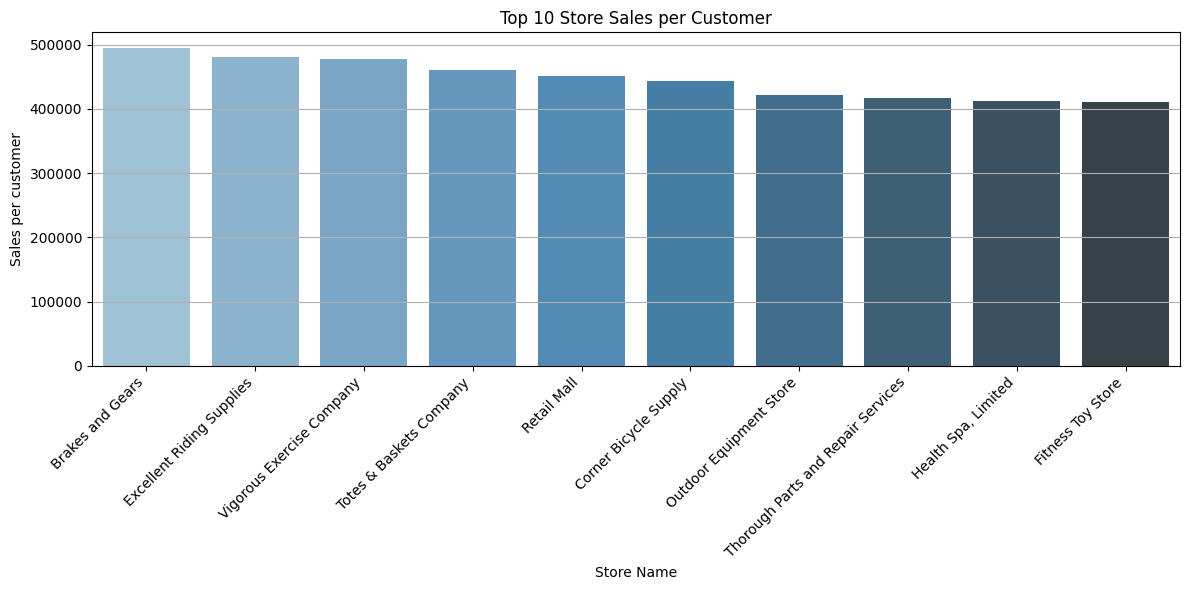

In [ ]:
top_10_stores = store_analysis.head(10)
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=top_10_stores, x='Name', y='Sales_per_Customer', palette='Blues_d')

# إعدادات المحاور والعنوان
plt.xlabel('Store Name')
plt.ylabel('Sales per customer')
plt.title('Top 10 Store Sales per Customer')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# إظهار الرسم البياني
plt.tight_layout()
plt.show()

In [ ]:
store_customers = merged_df.groupby('Name')['CustomerID'].nunique().reset_index()

# تغيير اسم العمود للوضوح
store_customers.columns = ['Store_Name', 'Unique_Customers']

# عرض النتائج
print(store_customers)

                    Store_Name  Unique_Customers
0        A Bicycle Association                 1
1                 A Bike Store                 2
2                 A Cycle Shop                 1
3      A Great Bicycle Company                 2
4          A Typical Bike Shop                 2
..                         ...               ...
694             World of Bikes                 2
695  Worthwhile Activity Store                 2
696          Year-Round Sports                 2
697     Yellow Bicycle Company                 2
698            eCommerce Bikes                 2

[699 rows x 2 columns]


In [ ]:
# حساب إجمالي المبيعات (TotalDue) لكل متجر
store_sales= merged_df.groupby('Name')['TotalDue'].sum().reset_index()

# العثور على المتجر ذو المبيعات الأقل
lowest_sales_store = store_sales.loc[store_sales['TotalDue'].idxmin()]

# عرض اسم المتجر والمبيعات
print(f"The store with the lowest total revenue is: {lowest_sales_store['Name']} Total revenue: {lowest_sales_store['TotalDue']}")


The store with the lowest total revenue is: A Bicycle Association Total revenue: 0.0


In [ ]:
merged_df['OrderDate'] = pd.to_datetime(merged_df['OrderDate'])

# إنشاء عمود لفترة زمنية شهرية
merged_df['OrderMonth'] = merged_df['OrderDate'].dt.to_period('M')

store_sales_over_time = merged_df.groupby(['Name', 'OrderMonth'])['TotalDue'].sum().reset_index()
print(store_sales_over_time)

                         Name OrderMonth     TotalDue
0                A Bike Store    2011-07   12381.0798
1                A Bike Store    2011-10   22152.2446
2                A Bike Store    2012-01   31972.1684
3                A Bike Store    2012-03   29418.5269
4     A Great Bicycle Company    2011-08    2931.9869
...                       ...        ...          ...
3776          eCommerce Bikes    2012-03  105780.1033
3777          eCommerce Bikes    2012-06   53375.5838
3778          eCommerce Bikes    2012-09   40986.0702
3779          eCommerce Bikes    2012-12   26555.8052
3780          eCommerce Bikes    2013-03   36308.0778

[3781 rows x 3 columns]


In [ ]:
merged_df['OrderDate'] = pd.to_datetime(merged_df['OrderDate'])

# إنشاء عمود لفترة زمنية شهرية
merged_df['OrderMonth'] = merged_df['OrderDate'].dt.to_period('M')

store_sales_over_time = merged_df.groupby(['Name', 'OrderMonth'])['TotalDue'].sum().reset_index()

# إضافة عمود SalesGrowth قبل ملء القيم المفقودة
store_sales_over_time['SalesGrowth'] = store_sales_over_time.groupby('Name')['TotalDue'].pct_change() * 100


# ملء القيم المفقودة في SalesGrowth بـ 0، لأن أول فترة لا تحتوي على نسبة نمو
store_sales_over_time['SalesGrowth'] = store_sales_over_time['SalesGrowth'].fillna(0)
print(store_sales_over_time)

                         Name OrderMonth     TotalDue  SalesGrowth
0                A Bike Store    2011-07   12381.0798     0.000000
1                A Bike Store    2011-10   22152.2446    78.920134
2                A Bike Store    2012-01   31972.1684    44.329250
3                A Bike Store    2012-03   29418.5269    -7.987076
4     A Great Bicycle Company    2011-08    2931.9869     0.000000
...                       ...        ...          ...          ...
3776          eCommerce Bikes    2012-03  105780.1033    51.986384
3777          eCommerce Bikes    2012-06   53375.5838   -49.540999
3778          eCommerce Bikes    2012-09   40986.0702   -23.211950
3779          eCommerce Bikes    2012-12   26555.8052   -35.207730
3780          eCommerce Bikes    2013-03   36308.0778    36.723694

[3781 rows x 4 columns]


In [ ]:
# تجميع المبيعات حسب المتجر والفترة الزمنية
store_sales_over_time = merged_df.groupby(['Name', 'OrderMonth'])['TotalDue'].sum().reset_index()

# حساب نسبة النمو لكل متجر باستخدام طريقة 'diff()' لحساب الفرق بين كل فترة والفترة التي تسبقها
store_sales_over_time['SalesGrowth'] = store_sales_over_time.groupby('Name')['TotalDue'].pct_change() * 100

# ملء القيم المفقودة في SalesGrowth بـ 0، لأن أول فترة لا تحتوي على نسبة نمو
store_sales_over_time['SalesGrowth'] = store_sales_over_time['SalesGrowth'].fillna(0)

# العثور على الفترات الزمنية ذات أعلى نسبة نمو لكل متجر
# **التغيير هنا: استخدام dropna() قبل idxmax() لإزالة الصفوف التي تحتوي على NaN في SalesGrowth**
highest_growth_periods = store_sales_over_time.dropna(subset=['SalesGrowth']).loc[store_sales_over_time.groupby('Name')['SalesGrowth'].idxmax()]

# عرض النتائج
print("الفترات الزمنية التي شهدت أعلى نسبة نمو في المبيعات لكل متجر:")
print(highest_growth_periods[['Name', 'OrderMonth', 'SalesGrowth']])

الفترات الزمنية التي شهدت أعلى نسبة نمو في المبيعات لكل متجر:
                            Name OrderMonth   SalesGrowth
1                   A Bike Store    2011-10     78.920134
4        A Great Bicycle Company    2011-08      0.000000
11           A Typical Bike Shop    2011-10    596.886513
15    Acceptable Sales & Service    2012-03     99.999958
18           Accessories Network    2014-05    222.471042
...                          ...        ...           ...
3754              World of Bikes    2014-05     35.130064
3758   Worthwhile Activity Store    2013-05  22024.170368
3767           Year-Round Sports    2012-09  11845.918636
3771      Yellow Bicycle Company    2012-02    185.844868
3774             eCommerce Bikes    2011-10     85.381098

[633 rows x 3 columns]


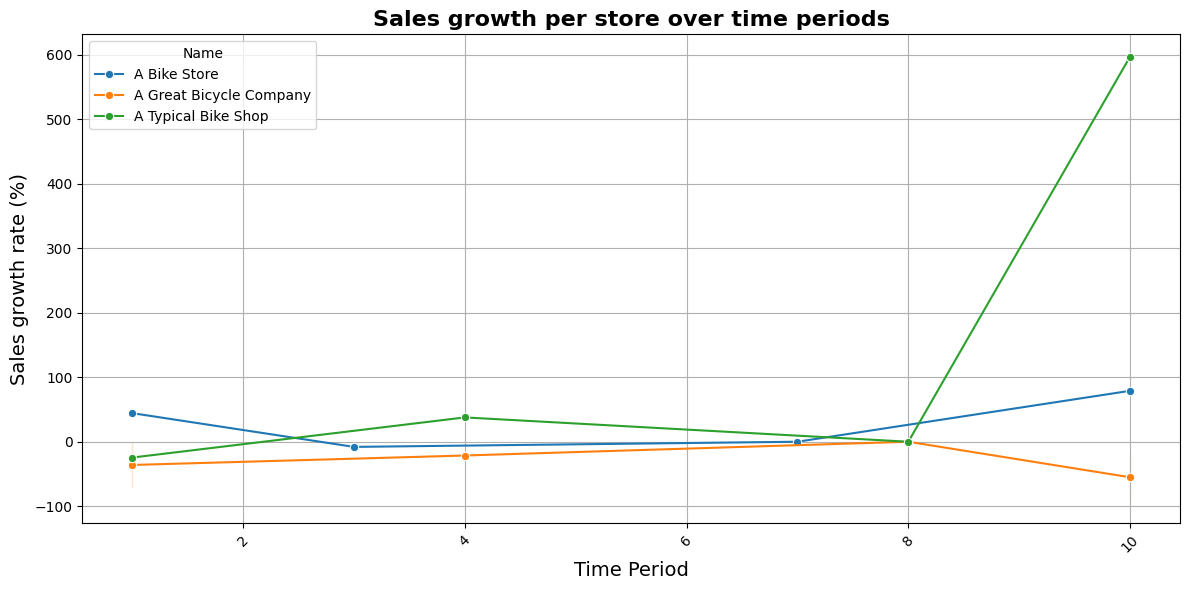

In [ ]:
# تأكدي من أنك قد قمت بتجميع بيانات المبيعات حسب المتجر والفترة الزمنية
store_sales_over_time = merged_df.groupby(['Name', 'OrderMonth'])['TotalDue'].sum().reset_index()

# حساب نسبة النمو
store_sales_over_time['SalesGrowth'] = store_sales_over_time.groupby('Name')['TotalDue'].pct_change() * 100
store_sales_over_time['SalesGrowth'] = store_sales_over_time['SalesGrowth'].fillna(0)

# اختيار عينة من المتاجر (مثلاً 3 متاجر فقط)
sample_stores = store_sales_over_time['Name'].unique()[:3]  # اختيار أول 3 متاجر فقط
filtered_data = store_sales_over_time[store_sales_over_time['Name'].isin(sample_stores)]

# Convert 'OrderMonth' to datetime objects if it is PeriodDtype
if pd.api.types.is_period_dtype(filtered_data['OrderMonth']):
    filtered_data['OrderMonth'] = filtered_data['OrderMonth'].dt.to_timestamp()
else:
    filtered_data['OrderMonth'] = pd.to_datetime(filtered_data['OrderMonth'])

# Extract the month as an integer
filtered_data['OrderMonth'] = filtered_data['OrderMonth'].dt.month

# Now plot the data
plt.figure(figsize=(12, 6), dpi=100)
sns.lineplot(data=filtered_data, x='OrderMonth', y='SalesGrowth', hue='Name', marker='o')

# إضافة العناوين والتسميات للمحاور
plt.xlabel('Time Period', fontsize=14)
plt.ylabel('Sales growth rate (%)', fontsize=14)
plt.title('Sales growth per store over time periods', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid()

# تحسين التخطيط وعرض الرسم البياني
plt.tight_layout()
plt.show()


In [ ]:
# تأكد من أن لديك بيانات المبيعات. لنفترض أن لديك DataFrame باسم merged_df الذي يحتوي على الأعمدة المطلوبة
# هنا افترض أن لديك أعمدة مثل 'TotalDue' و 'OrderDate' (تاريخ الطلب) والتي يمكن استخدامها لاستخراج السنة.

# 1. استخراج السنة من تاريخ الطلب
merged_df['Year'] = pd.to_datetime(merged_df['OrderDate']).dt.year

# 2. تجميع بيانات المبيعات حسب المتجر والسنة
annual_sales = merged_df.groupby(['Name', 'Year'])['TotalDue'].sum().reset_index()

# 3. حساب نسبة النمو السنوي لكل متجر
annual_sales['SalesGrowth'] = annual_sales.groupby('Name')['TotalDue'].pct_change() * 100

# 4. ملء القيم المفقودة في SalesGrowth بـ 0 (السنة الأولى لكل متجر لن تحتوي على نسبة نمو)
annual_sales['SalesGrowth'] = annual_sales['SalesGrowth'].fillna(0)

# 5. العثور على المتجر الذي حقق أعلى نسبة نمو
highest_growth_store = annual_sales.loc[annual_sales['SalesGrowth'].idxmax()]

# 6. عرض النتائج
print("المتجر الذي حقق أعلى نسبة نمو مقارنة بالسنة السابقة:")
print(highest_growth_store[['Name', 'Year', 'SalesGrowth']])


المتجر الذي حقق أعلى نسبة نمو مقارنة بالسنة السابقة:
Name           Classic Cycle Store
Year                        2012.0
SalesGrowth         1422171.794468
Name: 208, dtype: object


**Customer analysis**

In [ ]:
customers_df = pd.read_excel(xls, sheet_name='Customer')
sales_order_df = pd.read_excel(xls, sheet_name='SalesOrderHeader')
sales_order_df.head()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,43659,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43659,PO522145787,10-4020-000676,...,16281.0,105041Vi84182,NaN,20565.6206,1971.5149,616.0984,23153.2339,NaN,79B65321-39CA-4115-9CBA-8FE0903E12E6,2011-06-07
1,43660,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43660,PO18850127500,10-4020-000117,...,5618.0,115213Vi29411,NaN,1294.2529,124.2483,38.8276,1457.3288,NaN,738DC42D-D03B-48A1-9822-F95A67EA7389,2011-06-07
2,43661,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43661,PO18473189620,10-4020-000442,...,1346.0,85274Vi6854,4.0,32726.4786,3153.7696,985.5530,36865.8012,NaN,D91B9131-18A4-4A11-BC3A-90B6F53E9D74,2011-06-07
3,43662,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43662,PO18444174044,10-4020-000227,...,10456.0,125295Vi53935,4.0,28832.5289,2775.1646,867.2389,32474.9324,NaN,4A1ECFC0-CC3A-4740-B028-1C50BB48711C,2011-06-07
4,43663,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43663,PO18009186470,10-4020-000510,...,4322.0,45303Vi22691,NaN,419.4589,40.2681,12.5838,472.3108,NaN,9B1E7A40-6AE0-4AD3-811C-A64951857C4B,2011-06-07


In [ ]:
customers_df.head()

,CustomerID,PersonID,StoreID,TerritoryID,AccountNumber,rowguid,ModifiedDate
0,1,NaN,934.0,1,AW00000001,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2014-09-12 11:15:07.263
1,2,NaN,1028.0,1,AW00000002,E552F657-A9AF-4A7D-A645-C429D6E02491,2014-09-12 11:15:07.263
2,3,NaN,642.0,4,AW00000003,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2014-09-12 11:15:07.263
3,4,NaN,932.0,4,AW00000004,FF862851-1DAA-4044-BE7C-3E85583C054D,2014-09-12 11:15:07.263
4,5,NaN,1026.0,4,AW00000005,83905BDC-6F5E-4F71-B162-C98DA069F38A,2014-09-12 11:15:07.263


In [ ]:
merged_df = pd.merge(sales_order_df, customers_df, on='CustomerID')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SalesOrderID            31465 non-null  int64         
 1   RevisionNumber          31465 non-null  int64         
 2   OrderDate               31465 non-null  datetime64[ns]
 3   DueDate                 31465 non-null  datetime64[ns]
 4   ShipDate                31465 non-null  datetime64[ns]
 5   Status                  31465 non-null  int64         
 6   OnlineOrderFlag         31465 non-null  int64         
 7   SalesOrderNumber        31465 non-null  object        
 8   PurchaseOrderNumber     3806 non-null   object        
 9   AccountNumber_x         31465 non-null  object        
 10  CustomerID              31465 non-null  int64         
 11  SalesPersonID           3806 non-null   float64       
 12  TerritoryID_x           31465 non-null  int64 

In [ ]:
# متوسط الطلبات لكل عميل
orders_per_customer = merged_df.groupby('CustomerID')['SalesOrderID'].count()
print(orders_per_customer)

CustomerID
11000      8
11001     11
11002      4
11003      9
11004      6
        ... 
30114     30
30115     21
30116    119
30117    436
30118    289
Name: SalesOrderID, Length: 19119, dtype: int64


In [ ]:
# حساب متوسط عدد الطلبات لكل عميل
average_orders_per_customer = orders_per_customer.mean()

print(f"متوسط عدد الطلبات لكل عميل هو: {average_orders_per_customer}")

متوسط عدد الطلبات لكل عميل هو: 6.345363251216067


In [ ]:
file_path = '/content/production.xlsx'
pro= pd.ExcelFile('/content/production.xlsx')
products_df= pd.read_excel(pro, sheet_name='Product')
products_df.columns

Index(['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag',
       'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost',
       'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode',
       'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')

In [ ]:
sales_order_detail_df= pd.read_excel(xls, sheet_name='SalesOrderDetail')


In [ ]:
merged_df =pd.merge(sales_order_df, customers_df, on='CustomerID')
merged_df= pd.merge(merged_df, sales_order_detail_df, on='SalesOrderID')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SalesOrderID            121317 non-null  int64         
 1   RevisionNumber          121317 non-null  int64         
 2   OrderDate               121317 non-null  datetime64[ns]
 3   DueDate                 121317 non-null  datetime64[ns]
 4   ShipDate                121317 non-null  datetime64[ns]
 5   Status                  121317 non-null  int64         
 6   OnlineOrderFlag         121317 non-null  int64         
 7   SalesOrderNumber        121317 non-null  object        
 8   PurchaseOrderNumber     60919 non-null   object        
 9   AccountNumber_x         121317 non-null  object        
 10  CustomerID              121317 non-null  int64         
 11  SalesPersonID           60919 non-null   float64       
 12  TerritoryID_x           121317

In [ ]:
# Before merging, verify the column names in both dataframes
print(merged_df.columns)
print(products_df.columns)

Index(['SalesOrderID', 'RevisionNumber', 'OrderDate', 'DueDate', 'ShipDate',
       'Status', 'OnlineOrderFlag', 'SalesOrderNumber', 'PurchaseOrderNumber',
       'AccountNumber_x', 'CustomerID', 'SalesPersonID', 'TerritoryID_x',
       'BillToAddressID', 'ShipToAddressID', 'ShipMethodID', 'CreditCardID',
       'CreditCardApprovalCode', 'CurrencyRateID', 'SubTotal', 'TaxAmt',
       'Freight', 'TotalDue', 'Comment', 'rowguid_x', 'ModifiedDate_x',
       'PersonID', 'StoreID', 'TerritoryID_y', 'AccountNumber_y', 'rowguid_y',
       'ModifiedDate_y', 'SalesOrderDetailID', 'CarrierTrackingNumber',
       'OrderQty', 'ProductID', 'SpecialOfferID', 'UnitPrice',
       'UnitPriceDiscount', 'LineTotal', 'rowguid', 'ModifiedDate'],
      dtype='object')
Index(['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag',
       'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost',
       'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode',
       'Weight', 'Day

In [ ]:
#merged_df = pd.merge(merged_df, products_df, left_on='ProductID', right_on='ProductID')

common_cols = ['ModifiedDate', 'rowguid']  # List the duplicate column names
products_df = products_df.drop(columns=[col for col in common_cols if col in products_df.columns])
merged_df = pd.merge(merged_df, products_df,on='ProductID')

In [ ]:
# حساب عدد مرات شراء كل منتج
product_popularity = merged_df.groupby('ProductID')['OrderQty'].sum()

# إضافة أسماء المنتجات للنتائج
product_popularity = product_popularity.reset_index()
product_popularity = pd.merge(product_popularity, products_df[['ProductID', 'Name']], on='ProductID')

# ترتيب المنتجات حسب عدد مرات الشراء تنازليًا للحصول على المنتجات الأكثر شراءً
product_popularity = product_popularity.sort_values(by='OrderQty', ascending=False)

# عرض المنتجات الأكثر شراءً (مثلاً أول 10 منتجات)
print("المنتجات الأكثر شراءً من قبل العملاء:")
print(product_popularity.head(10))

المنتجات الأكثر شراءً من قبل العملاء:
     ProductID  OrderQty                             Name
5          712      8311                     AWC Logo Cap
139        870      6815            Water Bottle - 30 oz.
4          711      6743           Sport-100 Helmet, Blue
8          715      6592       Long-Sleeve Logo Jersey, L
1          708      6532          Sport-100 Helmet, Black
0          707      6266            Sport-100 Helmet, Red
133        864      4247                  Classic Vest, S
142        873      3865              Patch Kit/8 Patches
153        884      3864  Short-Sleeve Classic Jersey, XL
7          714      3636       Long-Sleeve Logo Jersey, M


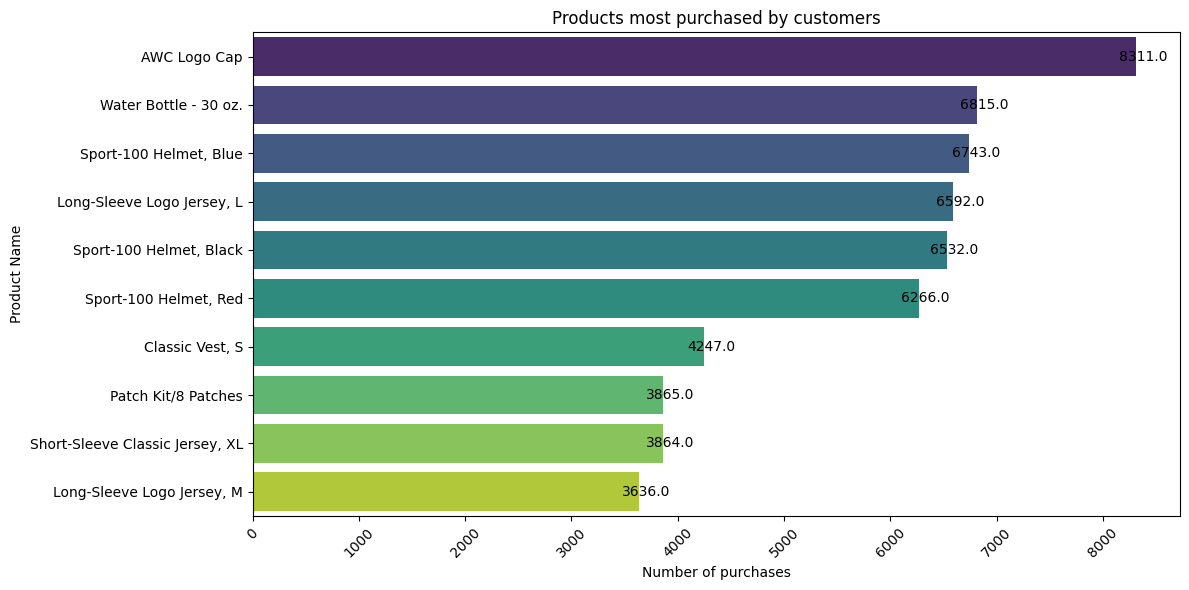

In [ ]:
# رسم المخطط
plt.figure(figsize=(12, 6))
ax= sns.barplot(data=product_popularity.head(10), x='OrderQty', y='Name', palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')
plt.title('Products most purchased by customers')
plt.xlabel('Number of purchases')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
merged_df['TotalSales'] = merged_df['UnitPrice'] * merged_df['OrderQty']

In [ ]:
total_sales_per_customer = merged_df.groupby('CustomerID')['TotalSales'].sum()
print(total_sales_per_customer )

CustomerID
11000      8248.9900
11001      6383.8800
11002      8114.0400
11003      8139.2900
11004      8196.0100
            ...     
30114     11652.9911
30115      8917.5594
30116    190906.1670
30117    817127.8029
30118    279039.5906
Name: TotalSales, Length: 19119, dtype: float64


In [ ]:
top_spending_customers = total_sales_per_customer.sort_values(ascending=False)
print(top_spending_customers)

CustomerID
29818    882276.4966
29722    860147.5110
29715    853850.6395
30117    817127.8029
29614    803769.8509
            ...     
28093         2.2900
28094         2.2900
28095         2.2900
28776         2.2900
30078         1.3740
Name: TotalSales, Length: 19119, dtype: float64


In [ ]:
# عرض العملاء الأكثر إنفاقًا (مثلاً أول 10 عملاء)
print("العملاء الأكثر إنفاقًا:")
print(top_spending_customers.head(10))

العملاء الأكثر إنفاقًا:
CustomerID
29818    882276.4966
29722    860147.5110
29715    853850.6395
30117    817127.8029
29614    803769.8509
29639    787808.8350
29701    751632.8575
29617    741363.2168
29994    735235.7035
29646    731636.8633
Name: TotalSales, dtype: float64


In [ ]:
# تحويل عمود تاريخ الطلب إلى صيغة التاريخ
sales_order_df['OrderDate'] = pd.to_datetime(sales_order_df['OrderDate'])

In [ ]:
print(sales_order_df['OrderDate'])

0       2011-05-31
1       2011-05-31
2       2011-05-31
3       2011-05-31
4       2011-05-31
           ...    
31460   2014-06-30
31461   2014-06-30
31462   2014-06-30
31463   2014-06-30
31464   2014-06-30
Name: OrderDate, Length: 31465, dtype: datetime64[ns]


In [ ]:
start_date = '2011-01-01'
end_date = '2014-12-31'

In [ ]:
# تصفية البيانات حسب الفترة الزمنية المحددة
filtered_orders = sales_order_df[(sales_order_df['OrderDate'] >= start_date) & (sales_order_df['OrderDate'] <= end_date)]

# حساب عدد الطلبات لكل عميل
purchase_frequency = filtered_orders.groupby('CustomerID')['SalesOrderID'].count().reset_index()

# إعادة تسمية الأعمدة
purchase_frequency.columns = ['CustomerID', 'PurchaseCount']

In [ ]:
# حساب معدل التكرار
average_purchase_frequency = purchase_frequency['PurchaseCount'].mean()

# طباعة معدل التكرار
print(f"معدل التكرار للشراء للعملاء هو: {average_purchase_frequency}")

معدل التكرار للشراء للعملاء هو: 1.6457450703488676


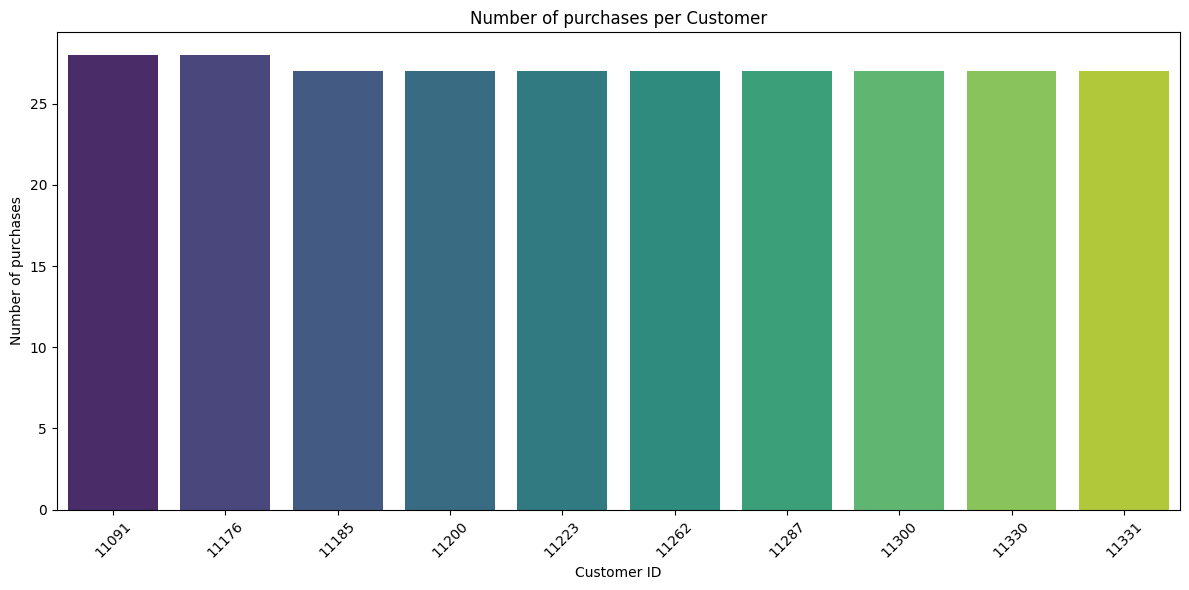

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=purchase_frequency.sort_values(by='PurchaseCount', ascending=False).head(10),
             x='CustomerID',
             y='PurchaseCount',
             palette='viridis')
plt.xlabel('Customer ID')
plt.ylabel('Number of purchases')
plt.title('Number of purchases per Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()